In [557]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk # Stemming # Lemmatization
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
 

In [576]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import datetime
from ipywidgets import interactive

In [558]:
def load_data():
    tweeted = pd.read_csv(r"C:\Users\user\Desktop\10_Academy\Updated_clean_processed_tweet.csv")
    return tweeted

In [559]:
DATASET_COLUMNS=['Target','Date_and_Time','Full_text','sentiment','Polarity','subjectivity','language','favorite_count','retweet_count','possibly_sensitive','Hashtags','user_mentions','Country']
DATASET_ENCODING = "ISO-8859-1"
Tweete_df = pd.read_csv(r"D:\New folder\Updated_clean_processed_tweet.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
Tweete_df.sample(5)

,,Target,Date_and_Time,Full_text,sentiment,Polarity,subjectivity,language,favorite_count,retweet_count,possibly_sensitive,Hashtags,user_mentions,Country
709,2022-08-07 21:07:33+00:00,['source'],"China expands military drills, escalates threa...",china expands military drills escalates threat...,0,-0.1,0.1,en,0,0,FALSE,Taiwan,washingtonpost,"à¸à¸£à¸¸à¸à¹à¸à¸à¸¡à¸«à¸²à¸à¸à¸£, à¸à¸..."
337,2022-08-07 21:50:39+00:00,['source'],RT @Some_Emo_Chick@mastodon.social\nFormer Ukr...,rt someemochickmastodonsocial former ukraine p...,0,-0.1,0.2,en,0,0,NaN,"russia, ukraine, WWIII, news, war",NaN,Springfield Missouri
213,2022-08-07 22:04:18+00:00,['source'],"RT @JiangJiang43: In a recent interview, Prof....",rt jiangjiang43 recent interview prof zheng yo...,-1,0,0.125,en,0,4,NaN,Pelosi,JiangJiang43,Hong Kong
98,2022-08-07 22:17:33+00:00,['source'],"RT @SpokespersonCHN: ""#Taiwan is part of China...",rt spokespersonchn taiwan part china thats abs...,1,0.133333333,0.433333333,en,0,669,NaN,Taiwan,SpokespersonCHN,Tasmania
403,2022-08-07 21:43:01+00:00,['source'],@georgegalloway You have no idea what you are ...,georgegalloway idea talking couldnt answer guy...,-1,0,0,en,0,0,NaN,"Taiwan, Kashmir",georgegalloway,Earth - Heaven in the Universe


# Read and Load the Dataset

In [560]:
Tweete_df=load_data()

In [561]:
Tweete_df.head()


,Target,Date_Teweeted_Time,source,Original_Text,Full_text,Sentiment,Polarity,Subjectivity,languge,Favorite_count,Retweet_count,Possibly_sensitive,Hashtags,User_mentions,place
0,0,2022-08-07 22:31:20+00:00,['source'],@i_ameztoy: Extra random image (I):\n\nLets f...,rt iameztoy extra random image lets focus one ...,0,-1.250000e-01,0.190625,en,0,2,NaN,City,i_ameztoy,NaN
1,1,2022-08-07 22:31:16+00:00,['source'],RT @IndoPac_Info: #China's media explains the ...,rt indopacinfo chinas media explains military ...,0,-1.000000e-01,0.100000,en,0,201,NaN,"China, Taiwan",IndoPac_Info,NaN
2,2,2022-08-07 22:31:07+00:00,['source'],"China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,-1,0.000000e+00,0.000000,en,0,0,NaN,XiJinping,ZelenskyyUa,Netherlands
3,3,2022-08-07 22:31:06+00:00,['source'],"Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,1,1.000000e-01,0.350000,en,0,0,NaN,XiJinping,NaN,Netherlands
4,4,2022-08-07 22:31:04+00:00,['source'],"RT @ChinaUncensored: I’m sorry, I thought Taiw...",rt chinauncensored i’m sorry thought taiwan in...,0,-6.940000e-18,0.556250,en,0,381,NaN,NaN,ChinaUncensored,"Ayent, Schweiz"


In [562]:
print('Dataset size:',Tweete_df.shape)
print('Columns are:',Tweete_df.columns)

Dataset size: (999, 15)
Columns are: Index(['Target', 'Date_Teweeted_Time', 'source', 'Original_Text', 'Full_text',
       'Sentiment', 'Polarity', 'Subjectivity', 'languge', 'Favorite_count',
       'Retweet_count', 'Possibly_sensitive', 'Hashtags', 'User_mentions',
       'place'],
      dtype='object')


# Exploratory Data Analysis and changing columns name 

In [563]:
Tweete_df.rename(columns={'created_at':'Date_and_Time','lang':'Language','place':'Country'}, inplace=True)

In [564]:
Tweete_df.head()

,Target,Date_Teweeted_Time,source,Original_Text,Full_text,Sentiment,Polarity,Subjectivity,languge,Favorite_count,Retweet_count,Possibly_sensitive,Hashtags,User_mentions,Country
0,0,2022-08-07 22:31:20+00:00,['source'],@i_ameztoy: Extra random image (I):\n\nLets f...,rt iameztoy extra random image lets focus one ...,0,-1.250000e-01,0.190625,en,0,2,NaN,City,i_ameztoy,NaN
1,1,2022-08-07 22:31:16+00:00,['source'],RT @IndoPac_Info: #China's media explains the ...,rt indopacinfo chinas media explains military ...,0,-1.000000e-01,0.100000,en,0,201,NaN,"China, Taiwan",IndoPac_Info,NaN
2,2,2022-08-07 22:31:07+00:00,['source'],"China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,-1,0.000000e+00,0.000000,en,0,0,NaN,XiJinping,ZelenskyyUa,Netherlands
3,3,2022-08-07 22:31:06+00:00,['source'],"Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,1,1.000000e-01,0.350000,en,0,0,NaN,XiJinping,NaN,Netherlands
4,4,2022-08-07 22:31:04+00:00,['source'],"RT @ChinaUncensored: I’m sorry, I thought Taiw...",rt chinauncensored i’m sorry thought taiwan in...,0,-6.940000e-18,0.556250,en,0,381,NaN,NaN,ChinaUncensored,"Ayent, Schweiz"


In [565]:
Tweete_df=Tweete_df.dropna(axis=1,how='all')

In [566]:
Tweete_df.shape

(999, 15)

In [567]:
#tweeted_df2 = tweeted_df.filter(items=['Date_and_Time','Tweeted','sentiment','polarity','Country'])

# Remove Speial characters

In [568]:
def cleanTxt(Full_text):
    Full_text=re.sub(r'@[A-Za-z0-9]+' ,' ',Full_text)
    Full_text=re.sub(r'#', ' ',Full_text)
    Full_text=re.sub(r'@[A-Za-z0-9]+' ,' ',Full_text)
    Full_text=re.sub(r'#', ' ',Full_text)
    
    

In [578]:
Tweete_df.head()

,Target,Date_Teweeted_Time,source,Original_Text,Full_text,Sentiment,Polarity,Subjectivity,languge,Favorite_count,Retweet_count,Possibly_sensitive,Hashtags,User_mentions,Country
0,0,2022-08-07 22:31:20+00:00,['source'],@i_ameztoy: Extra random image (I):\n\nLets f...,rt iameztoy extra random image lets focus one ...,0,-1.250000e-01,0.190625,en,0,2,NaN,City,i_ameztoy,NaN
1,1,2022-08-07 22:31:16+00:00,['source'],RT @IndoPac_Info: #China's media explains the ...,rt indopacinfo chinas media explains military ...,0,-1.000000e-01,0.100000,en,0,201,NaN,"China, Taiwan",IndoPac_Info,NaN
2,2,2022-08-07 22:31:07+00:00,['source'],"China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,-1,0.000000e+00,0.000000,en,0,0,NaN,XiJinping,ZelenskyyUa,Netherlands
3,3,2022-08-07 22:31:06+00:00,['source'],"Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,1,1.000000e-01,0.350000,en,0,0,NaN,XiJinping,NaN,Netherlands
4,4,2022-08-07 22:31:04+00:00,['source'],"RT @ChinaUncensored: I’m sorry, I thought Taiw...",rt chinauncensored i’m sorry thought taiwan in...,0,-6.940000e-18,0.556250,en,0,381,NaN,NaN,ChinaUncensored,"Ayent, Schweiz"


# Data Visualization 

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

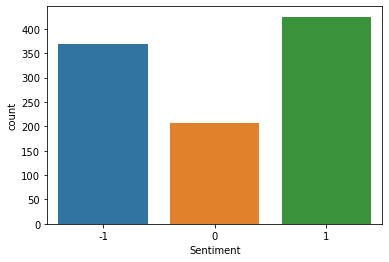

In [580]:

sns.countplot(x='Sentiment', data=Tweete_df)

In [575]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    source = [lm.lemmatize(word) for word in data]
    return data
Tweete_df['Full_text'] = Tweete_df['Full_text'].apply(lambda x: lemmatizer_on_text(x))
Tweete_df['Full_text'].head()

0    rt iameztoy extra random image lets focus one ...
1    rt indopacinfo chinas media explains military ...
2    china even cut communication dont anwer phonec...
3    putin xijinping told friend taiwan vassal stat...
4    rt chinauncensored i’m sorry thought taiwan in...
Name: Full_text, dtype: object

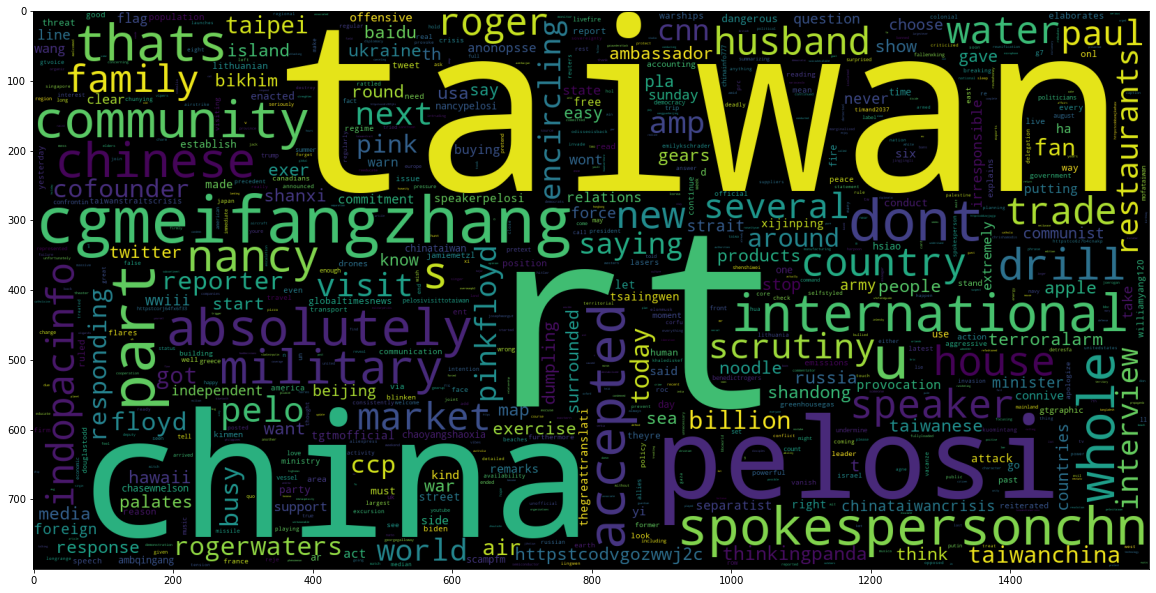

In [536]:
data_neg = Tweete_df['Full_text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

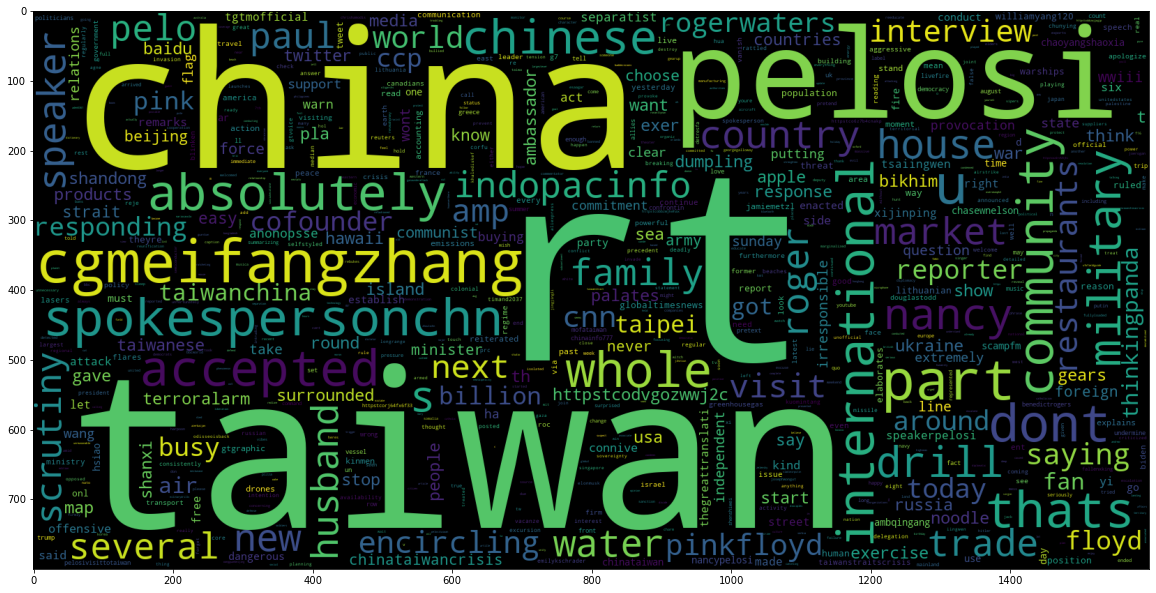

In [537]:
data_pos = Tweete_df['Full_text'][:800000]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [538]:
X=Tweete_df.Full_text
y=Tweete_df.Target

In [539]:
data_pos = Tweete_df[Tweete_df['Full_text'] == 1]
data_neg = Tweete_df[Tweete_df['Full_text'] == 0]

In [540]:
Tweete_df['Full_text'] = Tweete_df['Full_text'].replace(4,1)

In [541]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
    

In [542]:
dataset = pd.concat([data_pos, data_neg])
    

In [543]:
dataset['Full_text']=dataset['Full_text'].str.lower()
dataset['Full_text'].tail()

Series([], Name: Full_text, dtype: object)

In [544]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [545]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(Full_text):
    return " ".join([word for word in str(Full_text).split() if word not in STOPWORDS])
dataset['Full_text'] = dataset['Full_text'].apply(lambda Full_text: cleaning_stopwords(Full_text))
dataset['Full_text'].head()

Series([], Name: Full_text, dtype: object)

In [546]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['Full_text']= dataset['Full_text'].apply(lambda x: cleaning_punctuations(x))
dataset['Full_text'].tail()

Series([], Name: Full_text, dtype: object)

In [547]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['Full_text'] = dataset['Full_text'].apply(lambda x: cleaning_URLs(x))
dataset['Full_text'].tail()

Series([], Name: Full_text, dtype: object)

In [548]:
def model_Evaluate(model):
 # Predict values for Test dataset
 y_pred = model.predict(X_test)
 # Print the evaluation metrics for the dataset.
 print(classification_report(y_test, y_pred))
 # Compute and plot the Confusion matrix
 cf_matrix = confusion_matrix(y_test, y_pred)
 categories = ['Negative','Positive']
 group_names = ['True Neg','False Pos', 'False Neg','True Pos']
 group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
 labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
 labels = np.asarray(labels).reshape(2,2)
 sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
 xticklabels = categories, yticklabels = categories)
 plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
 plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
 plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Splitting our data into Train and Test Subset

In [555]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =1000)

# Transforming Dataset using TF-IDF Vectorizer

In [556]:
vectoriser = TfidfVectorizer(ngram_range=(1,4), max_features=1000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  1000


In [551]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

# Function For Model Evaluation

In [552]:
def model_Evaluate(model):

    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Model Building